<a href="https://colab.research.google.com/github/Kaavyagarg/d2k_newyork_taxi_data_processing/blob/main/d2k_newyork_taxi_dataprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import os
from datetime import datetime, timedelta

# Define the base URL for the dataset
base_url = "https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page"

# Define the year and month range
year = 2019
months = range(1, 13)

# Create a directory to store the downloaded files
data_dir = "data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Define a function to download a file
def download_file(url, filename):
    retries = 3
    while retries > 0:
        try:
            response = requests.get(url, stream=True)
            with open(filename, "wb") as f:
                for chunk in response.iter_content(1024):
                    f.write(chunk)
            print(f"Downloaded {filename}")
            return
        except requests.exceptions.RequestException as e:
            print(f"Error downloading {filename}: {e}")
            retries -= 1
    print(f"Failed to download {filename} after {3} retries")

# Download the files
for month in months:
    filename = f"yellow_tripdata_{year}-{month:02d}.csv"
    url = f"{base_url}yellow_tripdata_{year}-{month:02d}.csv"
    download_file(url, os.path.join(data_dir, filename))

In [ ]:
# !pip install pyarrow

In [ ]:

# import pandas as pd

# # Read the Parquet file
# df = pd.read_parquet('yellow_tripdata_2019-01.parquet')



In [ ]:
column_names = df.columns
print(column_names)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [ ]:
# for filename in os.listdir(data_dir):
#     print(f"File: {filename}, Extension: {filename.split('.')[-1]}")

File: yellow_tripdata_2019-12.csv, Extension: csv
File: yellow_tripdata_2019-05.csv, Extension: csv
File: yellow_tripdata_2019-10.csv, Extension: csv
File: yellow_tripdata_2019-11.csv, Extension: csv
File: yellow_tripdata_2019-04.csv, Extension: csv
File: yellow_tripdata_2019-08.csv, Extension: csv
File: yellow_tripdata_2019-06.csv, Extension: csv
File: yellow_tripdata_2019-07.csv, Extension: csv
File: yellow_tripdata_2019-01.csv, Extension: csv
File: yellow_tripdata_2019-09.csv, Extension: csv
File: yellow_tripdata_2019-03.csv, Extension: csv
File: yellow_tripdata_2019-02.csv, Extension: csv


In [9]:
import pandas as pd
import os

# Define the data directory
data_dir = "data"

# Define the column names
column_names = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

# Create a list to store the DataFrames
dfs = []

# Iterate through the CSV files in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        csv_file = os.path.join(data_dir, filename)
        print(f"Processing {csv_file}...")
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, names=column_names, header=None)

        # Remove any trips with missing or corrupt data
        df.dropna(inplace=True)

        # Convert datetime columns to datetime format
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

        # Derive new columns: trip duration and average speed
        df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
        df['average_speed'] = df['trip_distance'] / df['trip_duration']

        # Append the processed DataFrame to the list
        dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Aggregate data to calculate total trips and average fare per day
df['date'] = df['tpep_pickup_datetime'].dt.date
daily_trips = df.groupby('date').size().reset_index(name='total_trips')
daily_fare = df.groupby('date')['fare_amount'].mean().reset_index(name='average_fare')

# Merge the daily trips and fare DataFrames
daily_data = pd.merge(daily_trips, daily_fare, on='date')

print("Data processing complete!")
print(daily_data.head())

Processing data/yellow_tripdata_2019-08.csv...
Processing data/yellow_tripdata_2019-01.csv...
Processing data/yellow_tripdata_2019-04.csv...
Processing data/yellow_tripdata_2019-11.csv...
Processing data/yellow_tripdata_2019-07.csv...
Processing data/yellow_tripdata_2019-09.csv...
Processing data/yellow_tripdata_2019-05.csv...
Processing data/yellow_tripdata_2019-10.csv...
Processing data/yellow_tripdata_2019-03.csv...
Processing data/yellow_tripdata_2019-06.csv...
Processing data/yellow_tripdata_2019-12.csv...
Processing data/yellow_tripdata_2019-02.csv...
Data processing complete!
Empty DataFrame
Columns: [total_trips, date, average_fare]
Index: []


In [10]:
import pandas as pd
import os

# Define the data directory
data_dir = "data"

# Define the column names
column_names = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

# Create a list to store the DataFrames
dfs = []

# Iterate through the CSV files in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        csv_file = os.path.join(data_dir, filename)
        print(f"Processing {csv_file}...")
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, names=column_names, header=None, na_values=['NA', 'None', 'nan', ''])

        print(f"Initial DataFrame shape: {df.shape}")

        # Remove any trips with missing or corrupt data
        df.dropna(inplace=True)

        print(f"DataFrame shape after dropping NA: {df.shape}")

        # Convert datetime columns to datetime format
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

        # Derive new columns: trip duration and average speed
        df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
        df['average_speed'] = df['trip_distance'] / df['trip_duration']

        # Append the processed DataFrame to the list
        dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

print(f"Final DataFrame shape: {df.shape}")

# Aggregate data to calculate total trips and average fare per day
df['date'] = df['tpep_pickup_datetime'].dt.date
daily_trips = df.groupby('date').size().reset_index(name='total_trips')
daily_fare = df.groupby('date')['fare_amount'].mean().reset_index(name='average_fare')

# Merge the daily trips and fare DataFrames
daily_data = pd.merge(daily_trips, daily_fare, on='date')

print("Data processing complete!")
print(daily_data.head())

Processing data/yellow_tripdata_2019-08.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)
Processing data/yellow_tripdata_2019-01.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)
Processing data/yellow_tripdata_2019-04.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)
Processing data/yellow_tripdata_2019-11.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)
Processing data/yellow_tripdata_2019-07.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)
Processing data/yellow_tripdata_2019-09.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)
Processing data/yellow_tripdata_2019-05.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)
Processing data/yellow_tripdata_2019-10.csv...
Initial DataFrame shape: (243, 19)
DataFrame shape after dropping NA: (0, 19)


In [17]:
cursor.execute('''Drop table trips''')

In [18]:
import sqlite3

# Create a connection to the database
conn = sqlite3.connect('trips.db')

# Create a cursor object
cursor = conn.cursor()

# Create the table

cursor.execute('''
    CREATE TABLE trips (
        id INTEGER PRIMARY KEY,
        vendor_id INTEGER,
        pickup_datetime TEXT,
        dropoff_datetime TEXT,
        passenger_count INTEGER,
        trip_distance REAL,
        rate_code_id INTEGER,
        store_and_fwd_flag TEXT,
        pu_location_id INTEGER,
        do_location_id INTEGER,
        payment_type TEXT,
        fare_amount REAL,
        extra REAL,
        ta_tax REAL,
        tip_amount REAL,
        tolls_amount REAL,
        improvement_surcharge REAL,
        total_amount REAL,
        congestion_surcharge REAL,
        airport_fee REAL
    );
''')

# Load the data into the database
df.to_sql('trips', conn, if_exists='replace', index=False)

# Commit the changes
conn.commit()

# Close the connection
# conn.close()

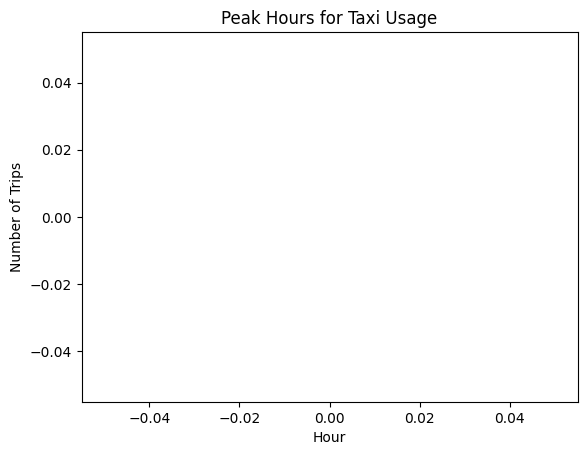

In [19]:
import matplotlib.pyplot as plt

# Create a cursor object
# cursor = conn.cursor()

# Execute the SQL query
cursor.execute("""
    SELECT
        strftime('%H', tpep_pickup_datetime) AS hour,
        COUNT(*) AS num_trips
    FROM
        trips
    GROUP BY
        hour
    ORDER BY
        num_trips DESC;
""")

# Fetch the results
results = cursor.fetchall()

# Create a bar chart
hours = [row[0] for row in results]
num_trips = [row[1] for row in results]
plt.bar(hours, num_trips)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Peak Hours for Taxi Usage')
plt.show()


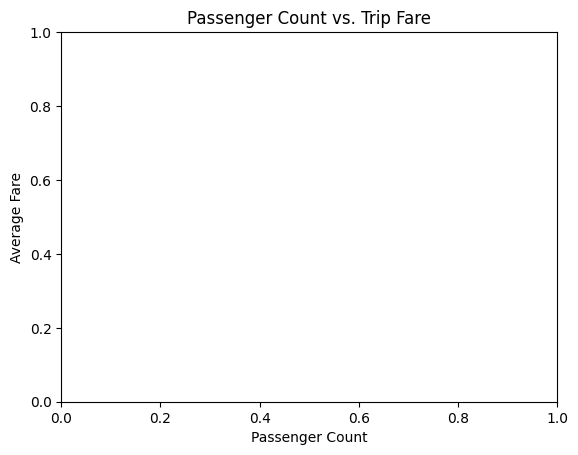

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt



# Execute the SQL query
cursor.execute("""
    SELECT
        passenger_count,
        AVG(fare_amount) AS avg_fare
    FROM
        trips
    GROUP BY
        passenger_count
    ORDER BY
        passenger_count;
""")

# Fetch the results
results = cursor.fetchall()

# Create a line plot
passenger_counts = [row[0] for row in results]
avg_fares = [row[1] for row in results]
sns.lineplot(x=passenger_counts, y=avg_fares)
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare')
plt.title('Passenger Count vs. Trip Fare')
plt.show()



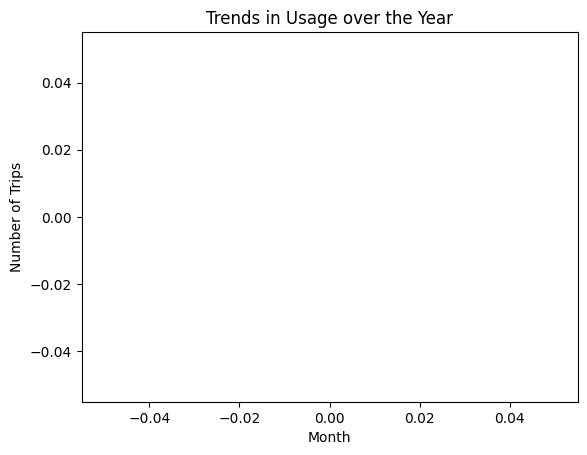

In [21]:
import matplotlib.pyplot as plt



# Execute the SQL query
cursor.execute("""
    SELECT
        strftime('%M',  tpep_pickup_datetime) AS month,
        COUNT(*) AS num_trips
    FROM
        trips
    GROUP BY
        month
    ORDER BY
        month;
""")

# Fetch the results
results = cursor.fetchall()

# Create a line plot
months = [row[0] for row in results]
num_trips = [row[1] for row in results]
plt.plot(months, num_trips)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trends in Usage over the Year')
plt.show()


In [22]:

# Close the connection
conn.close()

Conclusion- As the data is in improper format therefore an empty data frame is returned and that leads to empty plots
